In [38]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
# Load the dataset
csv_file_path = ('new_train.csv')
df = pd.read_csv(csv_file_path)

In [24]:
df

,id_code,diagnosis,Contrast,Dissimilarity,Energy,Correlation,Homogeneity
0,1a369baf9ee6,2,6785.781070,60.885210,0.036060,0.366548,0.062419
1,69591ebb198d,2,6950.300248,60.927691,0.089640,0.319620,0.128159
2,d88806d9ece9,2,5861.162556,56.403668,0.064749,0.436747,0.099381
3,4289af3afbd2,2,6771.364170,57.192765,0.124554,0.320355,0.159458
4,1b8ad0afe9fb,2,6398.103219,59.165839,0.038582,0.403548,0.065103
...,...,...,...,...,...,...,...
9020,a4b8de38eac1,3,6616.241772,54.195968,0.176966,0.298625,0.219347
9021,07a0e34c8d20,3,7383.758488,65.203235,0.048456,0.313733,0.071616
9022,269b44e628eb,3,7461.605441,66.508308,0.056430,0.300663,0.077996
9023,b2ffa3e18559,3,8793.555213,70.269579,0.079058,0.163651,0.107506


In [25]:
X = df.drop('id_code', axis=1)
X = df[['Contrast', 'Dissimilarity', 'Energy', 'Correlation', 'Homogeneity']]
y = df['diagnosis']

In [26]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [27]:
# Train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=110, random_state=10)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=110, random_state=10)

In [54]:
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate and print classification report
classification_rep_rf = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_rf)

# Extract precision, recall, and accuracy
lines = classification_rep_rf.split('\n')
precision_rf = float(lines[6].split()[1])
recall_rf = float(lines[6].split()[2])

Accuracy: 0.9623477297895903
Confusion Matrix:
[[172   0   3   2   0]
 [  0 185   0   0   0]
 [  3  10 169   7   6]
 [  0   0   0 162   0]
 [  0   0   0   3 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       177
           1       0.95      1.00      0.97       185
           2       0.98      0.87      0.92       195
           3       0.93      1.00      0.96       162
           4       0.97      0.98      0.98       184

    accuracy                           0.96       903
   macro avg       0.96      0.96      0.96       903
weighted avg       0.96      0.96      0.96       903



In [55]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate and print classification report
classification_rep_knn = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_knn)

# Extract precision, recall, and accuracy
lines = classification_rep_knn.split('\n')
precision_knn = float(lines[6].split()[1])
recall_knn = float(lines[6].split()[2])

Accuracy: 0.6666666666666666
Confusion Matrix:
[[127  16  11   8  15]
 [ 13 124  18  14  16]
 [ 32  31  73  22  37]
 [  0   7   2 151   2]
 [ 10  19  12  16 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       177
           1       0.63      0.67      0.65       185
           2       0.63      0.37      0.47       195
           3       0.72      0.93      0.81       162
           4       0.64      0.69      0.67       184

    accuracy                           0.67       903
   macro avg       0.66      0.68      0.66       903
weighted avg       0.66      0.67      0.65       903



In [56]:
# Train the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep_dt = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_dt)

# Extract precision, recall, and accuracy
lines = classification_rep_dt.split('\n')
precision_dt = float(lines[6].split()[1])
recall_dt = float(lines[6].split()[2])

Accuracy: 0.9601328903654485
Confusion Matrix:
[[166   5   4   1   1]
 [  0 184   0   1   0]
 [  2   8 174   7   4]
 [  0   0   0 162   0]
 [  0   0   0   3 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       177
           1       0.93      0.99      0.96       185
           2       0.98      0.89      0.93       195
           3       0.93      1.00      0.96       162
           4       0.97      0.98      0.98       184

    accuracy                           0.96       903
   macro avg       0.96      0.96      0.96       903
weighted avg       0.96      0.96      0.96       903



In [57]:
# Train the AdaBoost classifier
classifier = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy_abdt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_abdt)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep_abdt = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_abdt)

# Extract precision, recall, and accuracy
lines = classification_rep_abdt.split('\n')
precision_abdt = float(lines[6].split()[1])
recall_abdt = float(lines[6].split()[2])

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9623477297895903
Confusion Matrix:
[[169   3   4   1   0]
 [  0 185   0   0   0]
 [  4   9 172   6   4]
 [  0   0   0 162   0]
 [  0   0   0   3 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       177
           1       0.94      1.00      0.97       185
           2       0.98      0.88      0.93       195
           3       0.94      1.00      0.97       162
           4       0.98      0.98      0.98       184

    accuracy                           0.96       903
   macro avg       0.96      0.96      0.96       903
weighted avg       0.96      0.96      0.96       903



In [58]:
# Define the base estimator (decision tree)
base_estimator = RandomForestClassifier(n_estimators=110, random_state=10)

# Train the AdaBoost classifier
classifier = AdaBoostClassifier(RandomForestClassifier(n_estimators=110, random_state=10), random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy_abrf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_abrf)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep_abrf = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_abrf)

# Extract precision, recall, and accuracy
lines = classification_rep_abrf.split('\n')
precision_abrf = float(lines[6].split()[1])
recall_abrf = float(lines[6].split()[2])

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9634551495016611
Confusion Matrix:
[[173   0   2   2   0]
 [  0 185   0   0   0]
 [  5  10 169   7   4]
 [  0   0   0 162   0]
 [  0   0   0   3 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       177
           1       0.95      1.00      0.97       185
           2       0.99      0.87      0.92       195
           3       0.93      1.00      0.96       162
           4       0.98      0.98      0.98       184

    accuracy                           0.96       903
   macro avg       0.96      0.97      0.96       903
weighted avg       0.96      0.96      0.96       903



In [59]:
# Define the XGBoost classifier
classifier = xgb.XGBClassifier(objective='multi:softmax', random_state=42)

# Train the XGBoost classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep_xgb= classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep_xgb)

# Extract precision, recall, and accuracy
lines = classification_rep_xgb.split('\n')
precision_xgb = float(lines[6].split()[1])
recall_xgb = float(lines[6].split()[2])

Accuracy: 0.9424141749723145
Confusion Matrix:
[[171   1   2   3   0]
 [  1 179   5   0   0]
 [  3  12 164   7   9]
 [  0   0   0 162   0]
 [  0   1   5   3 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       177
           1       0.93      0.97      0.95       185
           2       0.93      0.84      0.88       195
           3       0.93      1.00      0.96       162
           4       0.95      0.95      0.95       184

    accuracy                           0.94       903
   macro avg       0.94      0.95      0.94       903
weighted avg       0.94      0.94      0.94       903



In [60]:
# Define the Gradient Boosting classifier
classifier_gb = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
classifier_gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = classifier_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(confusion_mat_gb)

classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(classification_rep_gb)

# Extract precision, recall, and accuracy
lines = classification_rep_gb.split('\n')
precision_gb = float(lines[6].split()[1])
recall_gb = float(lines[6].split()[2])

Gradient Boosting Accuracy: 0.7264673311184939
Gradient Boosting Confusion Matrix:
[[158   3   5   7   4]
 [ 12 130  23  12   8]
 [  8  25 112  23  27]
 [  1   7   7 141   6]
 [  5  15  32  17 115]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       177
           1       0.72      0.70      0.71       185
           2       0.63      0.57      0.60       195
           3       0.70      0.87      0.78       162
           4       0.72      0.62      0.67       184

    accuracy                           0.73       903
   macro avg       0.73      0.73      0.73       903
weighted avg       0.72      0.73      0.72       903



In [61]:
# Create a list of classifier labels
classifiers = ['Random Forest', 'KNN', 'Decision Tree', 'AdaBoost(RF)','AdaBoost(DT)', 'XGBoost','GradientBoost']

# Get the precision, recall, and accuracy scores from the scores dictionary
precision_scores = [precision_rf,precision_knn,precision_dt,precision_abrf,precision_abdt,precision_xgb, precision_gb]
recall_scores = [recall_rf,recall_knn,recall_dt,recall_abrf,recall_abdt,recall_xgb, recall_gb]
accuracy_scores = [accuracy_rf,accuracy_knn,accuracy_dt,accuracy_abrf,accuracy_abdt,accuracy_xgb,accuracy_gb]


[0.9623477297895903, 0.6666666666666666, 0.9601328903654485, 0.9634551495016611, 0.9623477297895903, 0.9424141749723145, 0.7264673311184939]


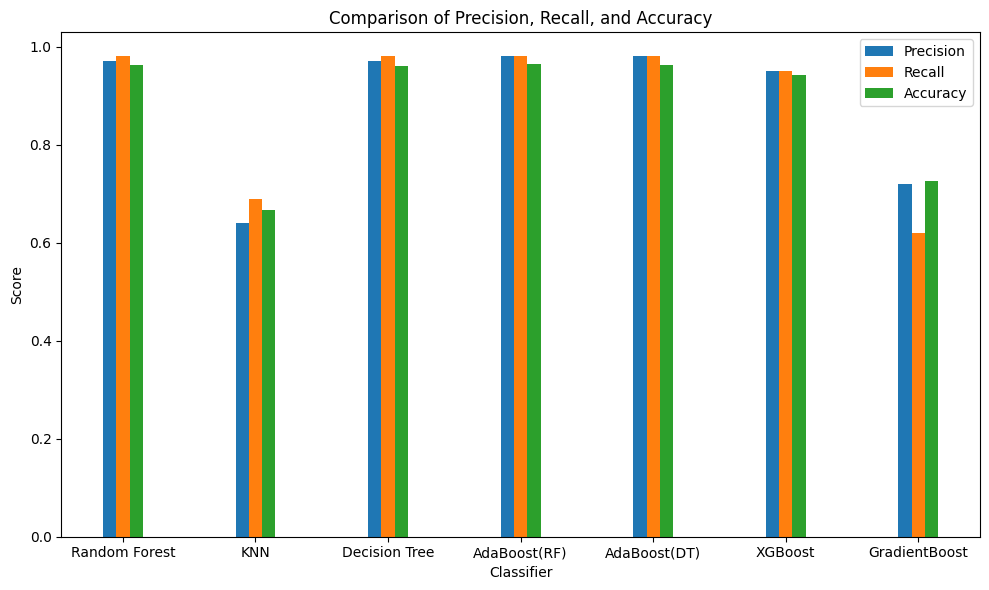

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming classifiers, precision_scores, recall_scores, and accuracy_scores are defined elsewhere

# Create the histogram
x = np.arange(len(classifiers))
width = 0.1

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as per your requirement
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, accuracy_scores, width, label='Accuracy')

ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Comparison of Precision, Recall, and Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

fig.tight_layout()
plt.show()
